# Predicting heart disease using machine learning 

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes

We're going to take the following approach
1. Problem Defination
2. Data
3. Evaluation 
4. Features
5. Model
6. Experimentation 

## 1. Problem Defination 

In a statement, 
 > Given clinical parameters about the patient, can we predict whether or not they have heart disease? 
 
 ## 2. Data
 > The original data came from the Cleaveland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/dataset/45/heart+disease

## 3. Evaluation 
 > If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we''ll purse the project. 

## 4. Features 
 This is where you'll get different infromation about each of the features in your data.
 
 **Create Data Dictionary** 
 
 1. age - age in years.
 2. sex - (1 = male; 0 = female)
 3. cp - chest paint type 
     * 0: Typical angina: chest pain related decerase blood supply to the heart
     * 1: Atypical angina: chest pain not related to heart
     * 2: Non-anginal pain: typically esophageal spasms(non heart related) 
     * 3: Asymptomatic: chest pain not showinng signs of disease
 4. trestbps -resting blood pressure (in mm Hf on admission to the hospital) anything above 130-140 is typically cause for concern.
 5. chol - serum cholestrol in mg/dl
     * serum = LDL + HDL + 0.2 triglycerides
     * above 200 is cause for concern
 6. fbs - (fasting blood sugar > 120 mg/dl) (1 = True; 0 = False) 
     * ">126" mg/dl signals diabetes
 7. restecg - reseting electrocardiographic results 
     * 0: Nothing to note
     * 1: ST-T Wave abnormality 
         * can range from mild symptoms to severe problems
         * signals non-normal heart beat
     * 2: Possible or definite left ventricular hypertrophy 
         * Enlarged heart's main pumping chamber. 
 8. thalach - maximum heart rate achieved
 9. exang - exercise induced angina ( 1= yes; 0 = no)
 10. oldpeak - ST depression induced by exercise relative to rest looks at          stress of heart
 11. slope - the slope of the peak exercise ST segment 
     * 0: Upsloping: better heart rate with exercise (uncommon) 
     * 1: Flatsloping: minimal change ( typical healthy heart)
     * 2: Downslopins: signs of unhealthy heart
 12. ca - number of major vessels (0-3) colored by flourosopy
     * colored vessel means the doctor can see the blood passing through 
     * the more blood movement the better ( no clots) 
 13. thal - thalium stress result 
     * 1,3: normal
     * 6: fixed defect: used to be defect but ok now 
     * 7: reversable defect: no proper blood movement when exercising
 14. target -  have disease or not ( 1= yes, 0 = no) (= the predicate attribute) 

## Preparing the tools 
We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation.

In [81]:
# Import all the necessary tools we need 
# Regular EDA (exploratory data analysis) and plotting libraries 

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

# We want our plots to appear inside the notebook
%matplotlib inline  

#Models from scikit-learn
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier

#Models Evaluation 
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay


In [3]:
## Loading Data

df = pd.read_csv("160 - heart-disease.csv")
df.shape #shows rows and columns 

(303, 14)

## Data Exploration (exploratory data analysis or EDA)
The goal here is to find out more about the data and become a subject matter expert on the dataset your're working with. 

1) What type of question(s) are you trying to solve ?
2) What kind of data do we have and how do we treat different types?
3) What's missing from the data and how do u deal with it ?
4) Where are the outliers and why should u care about them ?
5) How can you add, remove or change the data features to get more out of your data ?

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
#To find out how many of each class there 
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target'>

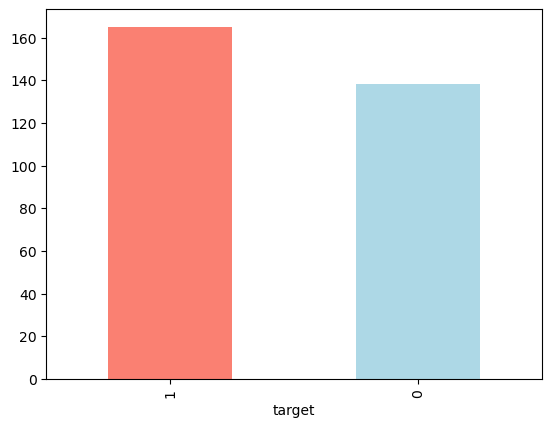

In [7]:
df["target"].value_counts().plot(kind = "bar", color=['salmon', "lightblue"])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
# whats missing from the data or are there any missing values 
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease Frequence according to Gender

In [11]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

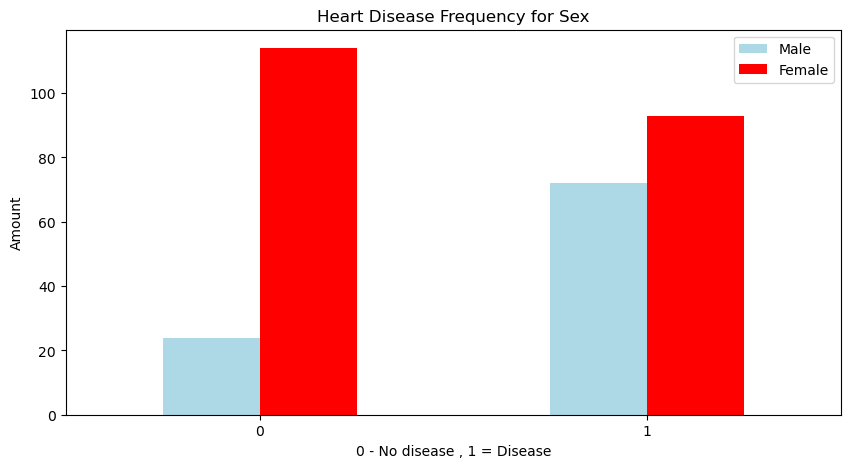

In [12]:
#Compare target column with sex column 
pd.crosstab(df.target, df.sex).plot(kind="bar", color=["lightblue" , 'red'], figsize=(10,5))

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 - No disease , 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Male" , "Female"])
plt.xticks(rotation = 0)

## Age vs Max Heart Rate for Heart Disease

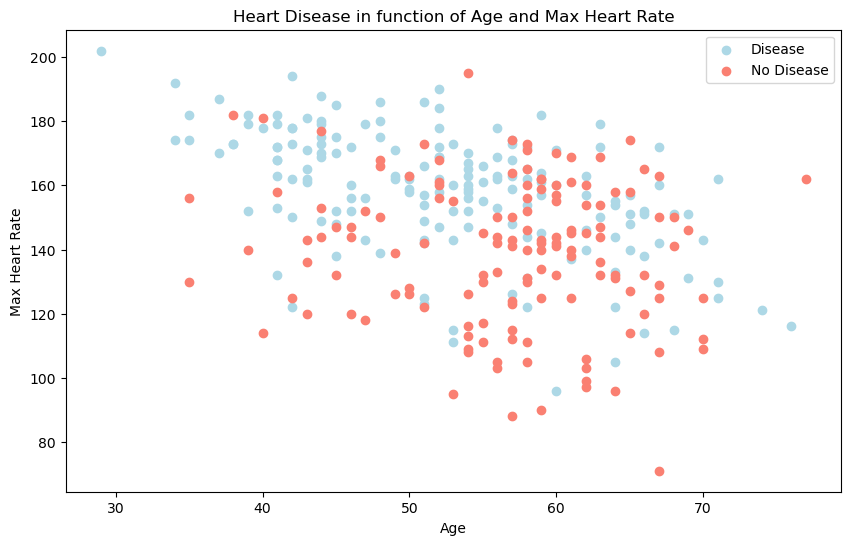

In [13]:
#Create another figure 
plt.figure(figsize=(10,6))

#Scatter with positive examples
plt.scatter(df.age[df.target == 1],
           df.thalach[df.target == 1],
           color ="lightblue")

#Scatter with negative examples
plt.scatter(df.age[df.target == 0],
           df.thalach[df.target == 0],
           color = "salmon")

#Add some helpful info 
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"])

<Axes: ylabel='Frequency'>

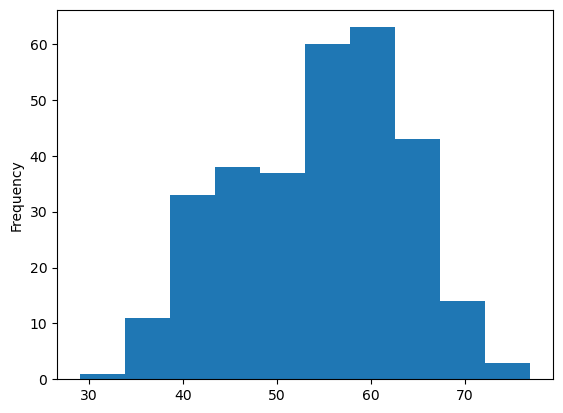

In [14]:
#Check the distribution of the age column with the histogram 
df.age.plot.hist()

### Heart Disease Frequency per Chest Pain Type
* cp - chest paint type 
     * 0: Typical angina: chest pain related decerase blood supply to the heart
     * 1: Atypical angina: chest pain not related to heart
     * 2: Non-anginal pain: typically esophageal spasms(non heart related) 
     * 3: Asymptomatic: chest pain not showinng signs of disease

In [15]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


C:\Users\abhis\AppData\Local\Temp\ipykernel_6732\3600852489.py:8: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend("No Disease", "Disease")


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

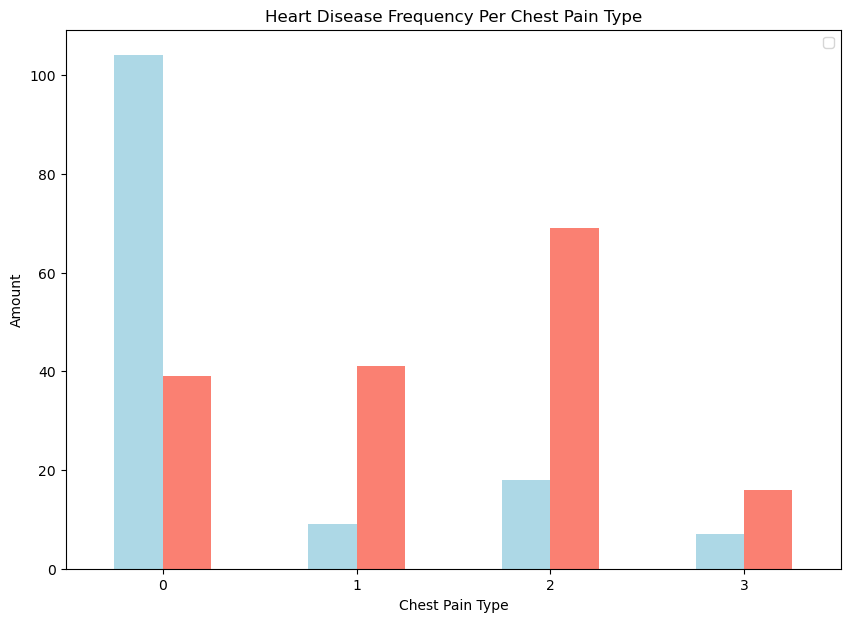

In [16]:
#making the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind ="bar", figsize=(10,7), color=["lightblue", "salmon"])

#Add some title
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend("No Disease", "Disease")
plt.xticks(rotation = 0)

In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


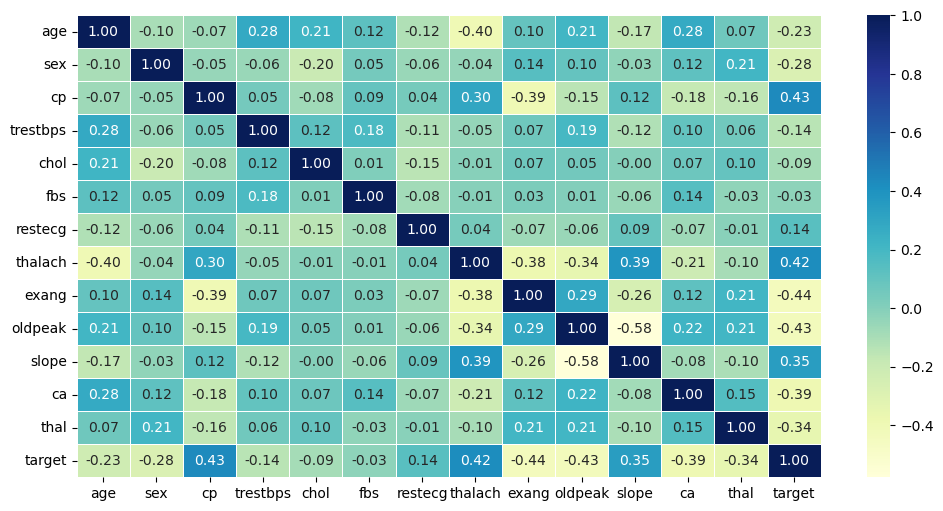

In [19]:
#Make a correlation Matrix 
corr_matrix = df.corr() 
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.heatmap(corr_matrix,
                annot = True,
                linewidths = 0.5,
                fmt = ".2f",
                cmap = "YlGnBu")


## 5. Modelling

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
#Split data into X and Y
x = df.drop("target" , axis = 1)
y = df["target"]

In [22]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [23]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [24]:
#Spliting data into train and test sets
np.random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

#### We have spilt the data into test and training models , now to find which machine learning model to use
#### We're going to use 3 machine learning models 
1) Logistic Regression
2) K-nearest Neighbours Classifier
3) Random Forest Classifier

In [25]:
# Put the models in the dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

def fit_and_score(models, x_train, Y_train, x_test, Y_test):
    """
        Fits and evaluates given machine learning models
        models: a dictionary of different Scikit learning models
        X_train: training data(no labels)
        y_train: training data(labels)
        x_test: testing data(no labels)
        y_test: testing data(labels)
    """
    
    np.random.seed(42)
    #Make a new empty dictionary to store model scores
    model_scores = {}
    
    for name, model in models.items():
        model.fit(x_train, y_train)
        #Evaluate the scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [26]:
model_scores = fit_and_score(models = models, x_train= x_train, Y_train = y_train, x_test = x_test, Y_test = y_test)
print(model_scores)

{'Logistic Regression': 0.8852459016393442, 'KNN': 0.6885245901639344, 'Random Forest': 0.8360655737704918}


C:\Users\abhis\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Model Comparision


<Axes: >

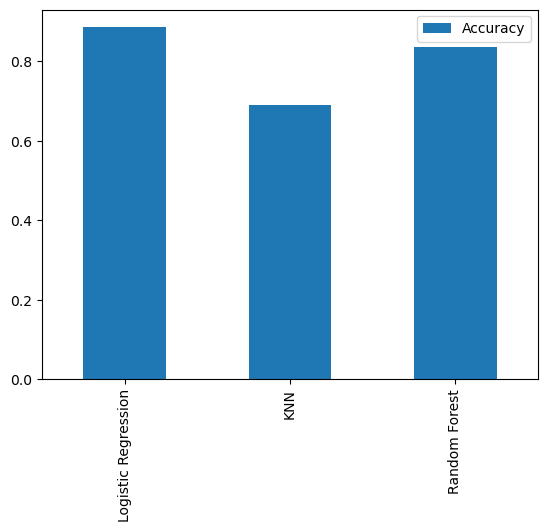

In [27]:
model_compare = pd.DataFrame(model_scores, index=["Accuracy"])
model_compare.T.plot.bar()

Now we've got a baseline model ... and after that we should look into:
 * Hyperparameter tuning
 * Feature Importance
 * Confusion Matrix
 * Cross-validation
 * Precision
 * Recall
 * F1 score
 * Classification Report
 * ROC Curve
 * Area under the curve (AUC)

## Hyperparameter Tuning

In [28]:
train_scores = []
test_scores = []

#Create a list of different values for n_neighbors
neighbors = range(1,21)

#setup Knn Instance 
knn = KNeighborsClassifier()

#Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    #Fit the algorithm
    knn.fit(x_train, y_train)
    
    #Update the training scores list 
    train_scores.append(knn.score(x_train, y_train));

In [29]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [30]:
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    #Fit the algorithm
    knn.fit(x_train, y_train)
    
    #Update the test scores list
    test_scores.append(knn.score(x_test, y_test))

In [31]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data is: 75.41%


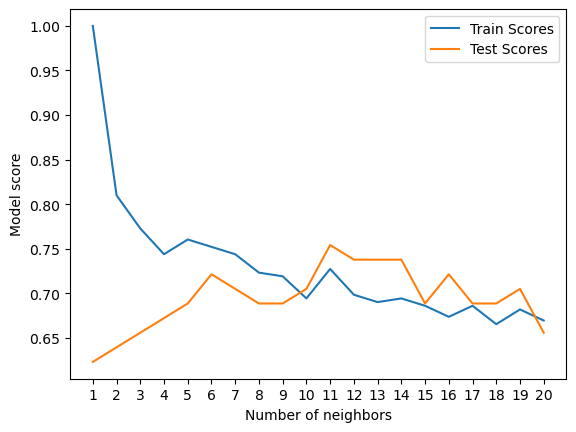

In [32]:
plt.plot(neighbors, train_scores, label="Train Scores")
plt.plot(neighbors, test_scores, label="Test Scores")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data is: {max(test_scores)*100:.2f}%")

### Hyperprameter tuning with RandomizedSearchCV
We're going to tune :
 * LogisticRegression()
 * RandomForestClassifier()
 
.... using randomizedsearchCV

In [46]:
#Create a hyperparameter grid for logisticRegression
log_reg_grid = {"C": np.logspace(-4,4,20),
               "solver": ["liblinear"]}

#Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators":  np.arange(10, 1000, 50),
          "max_depth": [None, 3, 5 ,10], 
          "min_samples_split": np.arange(2,10,2),
          "min_samples_leaf": np.arange(1,20,2)}

In [37]:
#Tune Logistic Regression 

np.random.seed(42)

#Setup Random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(), 
                               cv=5,
                               param_distributions = log_reg_grid,
                               n_iter = 20,
                               verbose= True)

#Fit random hyperparamter search model for LogisticRegression
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [38]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [39]:
rs_log_reg.score(x_test, y_test)

0.8852459016393442

Now we've tuned LogisticRegression(), lets do the same for RandomForestClassifier()

In [58]:
#setup random seed

np.random.seed(42)

#setup random hyperparamter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           cv=5,
                          param_distributions = rf_grid,
                          n_iter =20, verbose= True)

#Fit random hyperparameters search model for RandomForestClassifier()
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([2, 4, 6, 8]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [60]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 110,
 'min_samples_split': 6,
 'min_samples_leaf': 17,
 'max_depth': 3}

In [63]:
#Evaluate the randomized search RandomForestFlassifier model
rs_rf.score(x_test, y_test)

0.8852459016393442

In [62]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## HyperParameter Tuning with GridSearchCV

We are choosing Logistic Reggression model, we'll try to improve it more using GridSearchCV

In [68]:
#Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4 , 4, 30),
               "solver": ["liblinear"]}

#setup gridn hyperparameter search for LogisticRegression 
gs_log_reg = GridSearchCV(LogisticRegression(),
                          cv=5,
                          param_grid = log_reg_grid,
                          verbose= True)

# Fit grid hyperparameter search model 
gs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [69]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [71]:
# Evaluate the gris search LogisticRegression model
gs_log_reg.score(x_test, y_test)

0.8852459016393442

## Evaluate our tuned machine learning classifier, beyond accuracy
   * ROC curve and AUC score 
   * Confusion Matrix 
   * Classification report
   * Precision
   * Recall 
   * F1 - score
   
Make comparisions and evaluate our trained model, first we need to make predictions

In [72]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(x_test)

In [73]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

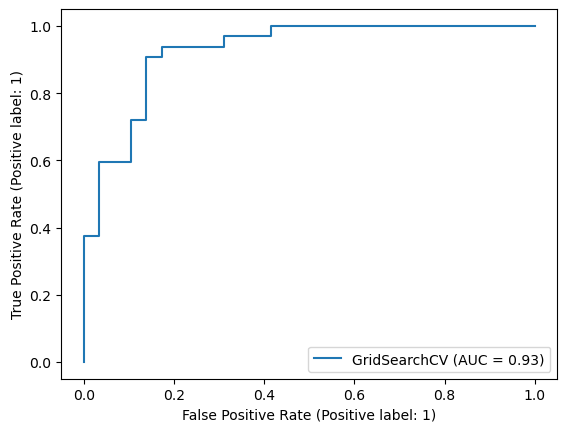

In [84]:
#Plot ROC curve and calculate AUC metric
RocCurveDisplay.from_estimator(gs_log_reg, x_test, y_test)

In [86]:
# Confusion Matrix

print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


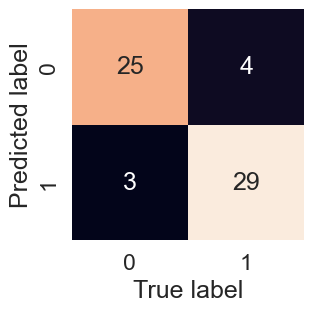

In [90]:
sns.set(font_scale = 1.5)

def plot_confusion_matrix(y_test, y_preds):
    """
        Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot = True,
                    cbar= False)
    plt.xlabel('True label')
    plt.ylabel("Predicted label")

plot_confusion_matrix(y_test, y_preds)

In [91]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Calculate evualtion metrics using corss-validation

We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score()`


In [92]:
# Check for best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [94]:
#Create a new classifier with best parameters
clf = LogisticRegression(C = 0.20433597178569418, solver = "liblinear")

In [100]:
#Cross-validated accuracy
cv_acc = cross_val_score(clf, x, y, cv=5, scoring="accuracy")
print(cv_acc)

cv_acc = np.mean(cv_acc)
cv_acc

[0.81967213 0.90163934 0.86885246 0.88333333 0.75      ]


0.8446994535519124

In [103]:
#Cross-validated Precision
cv_precision = cross_val_score(clf, x, y, cv=5, scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [104]:
#Cross-validated recall
cv_recall = cross_val_score(clf, x, y, cv=5, scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [105]:
#Cross-validated f1-score
cv_f1 = cross_val_score(clf, x, y, cv=5, scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

<Axes: title={'center': 'Cross-validated classification metrics'}>

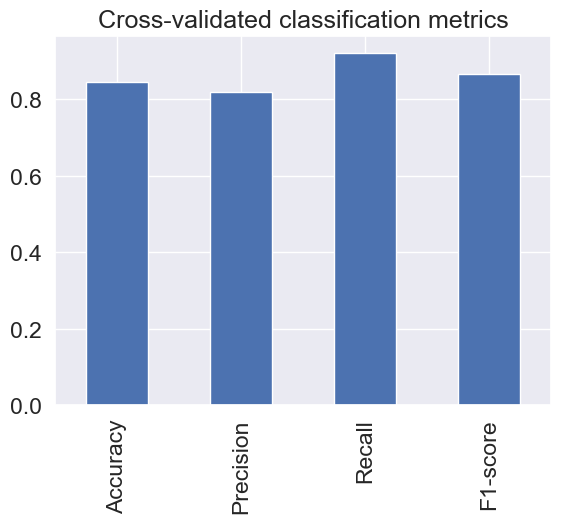

In [109]:
#Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1-score": cv_f1},
                           index = [0])

cv_metrics.T.plot.bar(title ="Cross-validated classification metrics", legend = False)

### Feature Importance

Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contirbute?"


Finding feature importance is different for each machine learning model.

In [110]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [113]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C = 0.20433597178569418, solver= 'liblinear')
clf.fit(x_train, y_train);

In [115]:
#Check coef
clf.coef_

array([[ 0.00316727, -0.86044582,  0.66067073, -0.01156993, -0.00166374,
         0.04386131,  0.31275787,  0.02459361, -0.60413038, -0.56862852,
         0.45051617, -0.63609863, -0.67663375]])

In [118]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672721856887734,
 'sex': -0.860445816920919,
 'cp': 0.6606707303492849,
 'trestbps': -0.011569930902919925,
 'chol': -0.001663741604035976,
 'fbs': 0.04386130751482091,
 'restecg': 0.3127578715206996,
 'thalach': 0.02459360818122666,
 'exang': -0.6041303799858143,
 'oldpeak': -0.5686285194546157,
 'slope': 0.4505161679452401,
 'ca': -0.6360986316921434,
 'thal': -0.6766337521354281}

<Axes: title={'center': 'Feature Importance'}>

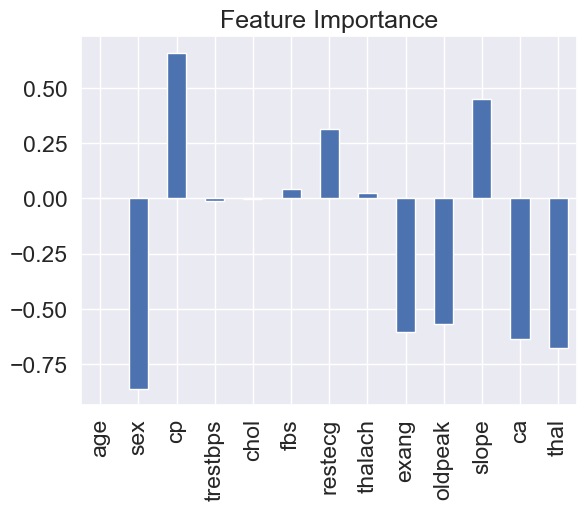

In [122]:
#Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False)